<a href="https://colab.research.google.com/github/leobioinf0/233_Introduccion_a_la_ciencia_de_datos/blob/main/2_5_EJEMPLO_DE_UN_MODELO_DE_REGRESION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
data_frame = pd.read_csv('./iris.csv')
data_frame.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


Una vez tenemos la base de datos cargada, necesitamos importar otros módulos que nos permitan seleccionar parte de los datos, para poder entrenar el modelo.


In [6]:
from sklearn.model_selection import train_test_split

Después, importaremos concretamente el modelo que queremos usar a partir de una
regresión lineal.

In [7]:
from sklearn.linear_model import LinearRegression

Después de importar estas librerías, lo que haremos será seleccionar solo las columnas
“Petal.Width” y “Petal.Length”, y las guardaremos en otra variable. Esta variable estará
guardando otra base de datos.

In [8]:
df = data_frame[['Petal.Length','Petal.Width']]
df.head()

,Petal.Length,Petal.Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Ahora, nos toca seleccionar de manera aleatoria una serie de observaciones para entrenar el
modelo. Concretamente, estamos cogiendo el 80 % de los registros y dejaremos el 20 %
restante para testar nuestro modelo.

In [9]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

Antes de continuar, guardaremos una copia del traint_set en una nueva variable.

In [10]:
df_copy = train_set.copy()

Una vez hemos hecho esto, aplicaremos la función corr() para ver cómo están relacionados
los valores de las dos columnas de la parte de entrenamiento. Recuerda que ahora ya no
estamos trabajando con toda la base de datos inicial. Primero, hemos seleccionado las
columnas que queríamos estudiar y, después, hemos cogido el 80 % para entrenar el modelo.

In [11]:
df_copy.corr()

,Petal.Length,Petal.Width
Petal.Length,1.000000,0.962577
Petal.Width,0.962577,1.000000


Un valor de 0,9625 es bastante alto. La relación es muy estrecha . Recuerda que R mide cómo
están de relacionadas entre sí dos variables. Cuanto más próximo sea este valor a 1 o –1, más
estrecha será la relación. Esto querrá decir que un cambio en una variable afectará
directamente a la otra.

In [12]:
from sklearn.metrics import r2_score

Ahora sería interesante visualizar los valores de las dos columnas en una gráfica. Por eso,
importamos el módulo siguiente:

In [13]:
import matplotlib.pyplot as plt

Asignamos, ahora, qué columna corresponderá al eje X y cuál al eje Y , y ya lo tenemos.

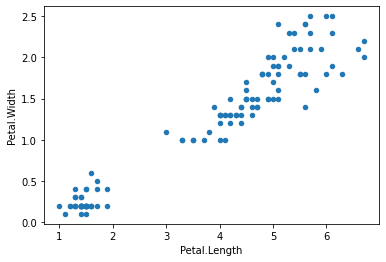

In [14]:
df_copy.plot.scatter(x='Petal.Length', y='Petal.Width')

Se ve claramente como las dos variables están estrechamente ligadas. Cuando una crece,
también lo hace la otra, tal como nos indicaba el resultado de la función corr() .
Bien, ahora viene el paso decisivo: aplicar el modelo escogido.

In [16]:
train_set_x = df_copy.drop(["Petal.Width"], axis=1)
train_set_label = df_copy["Petal.Width"]

Con este código, lo que estamos haciendo es decirle al modelo cuál será la variable
independiente y cuál será la variable de la que queremos predecir los resultados en función
de la primera.

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(train_set_x, train_set_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Creamos una instancia del objeto LinearRegression() y usamos la función fit() que contiene,
para aplicar el modelo. Además, este objeto lin_reg también incorpora coef e intercept .

In [21]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [0.41323829]
Intercept:  -0.35666804105655303


Los resultados que obtenemos son:

Coefficients: [0.41323829]

Intercept: -0.3566680410565528

Con estos valores, ya podemos escribir la fórmula matemática que define la regresión lineal:
$$Petal.width = 0.4132*Petal.Length – 0.3566$$
Pero, en vez de hacerlo a mano, el objeto lin_reg nos da la función predict(), en la que, si
ponemos el valor de la longitud del pétalo como argumento, esta nos devolverá el valor de la
anchura que predice.